In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wine1.csv")


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#numerical cols
num_col=df.select_dtypes(include=["int","float"]).columns
num_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#Categorical Columns
cat_col=df.select_dtypes(include=["object"]).columns
cat_col

Index([], dtype='object')

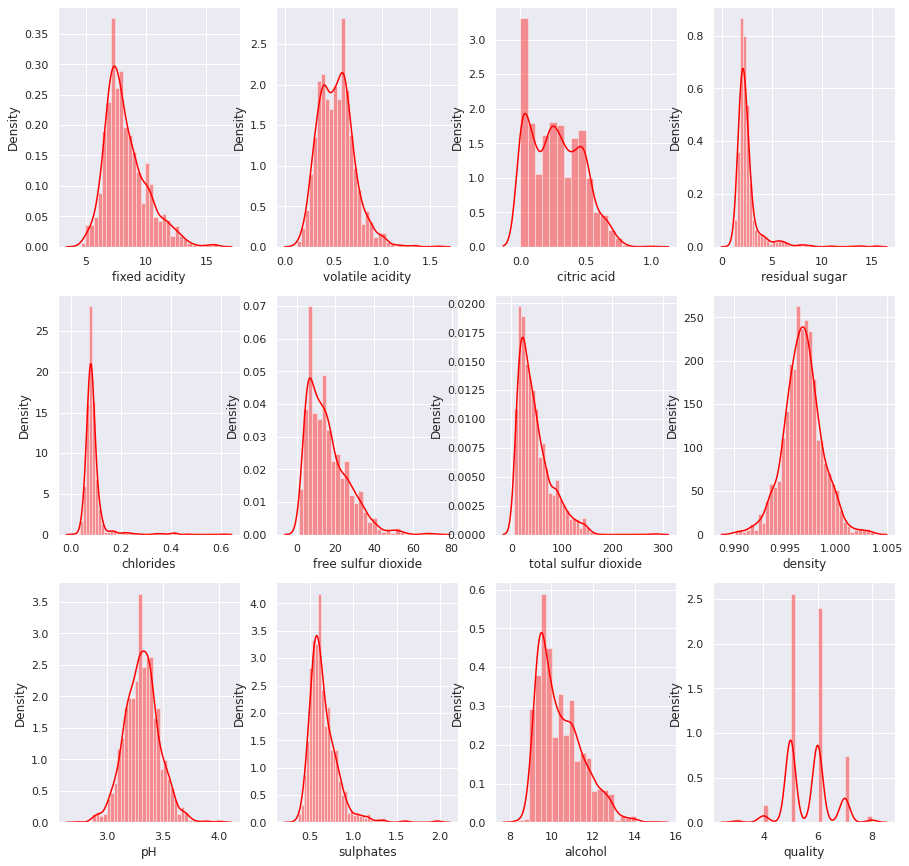

In [8]:
#Univaruate Analysis of Numerical Cols
sns.set()
fig=plt.figure(figsize=(15,15))
count=1
for i in num_col:
  plt.subplot(3,4,count)
  sns.distplot(df[i],color="red")
  count+=1
plt.show()

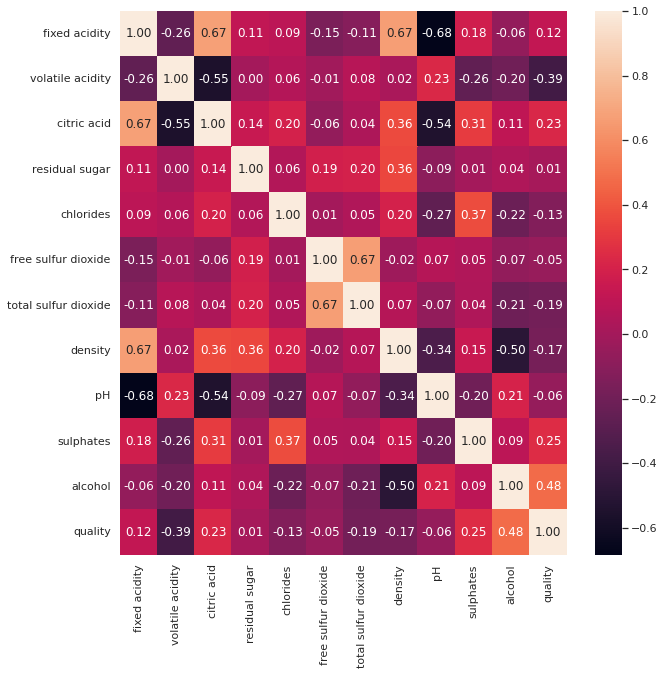

In [9]:
#Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [10]:
# High positive corelation of 0.67 observed 
#free sulfer dioxide and total sulfer dioxide are highly corelated.
#density and fixed acidity.
#citric acid and fixed acidity


# Bivariate Analysis

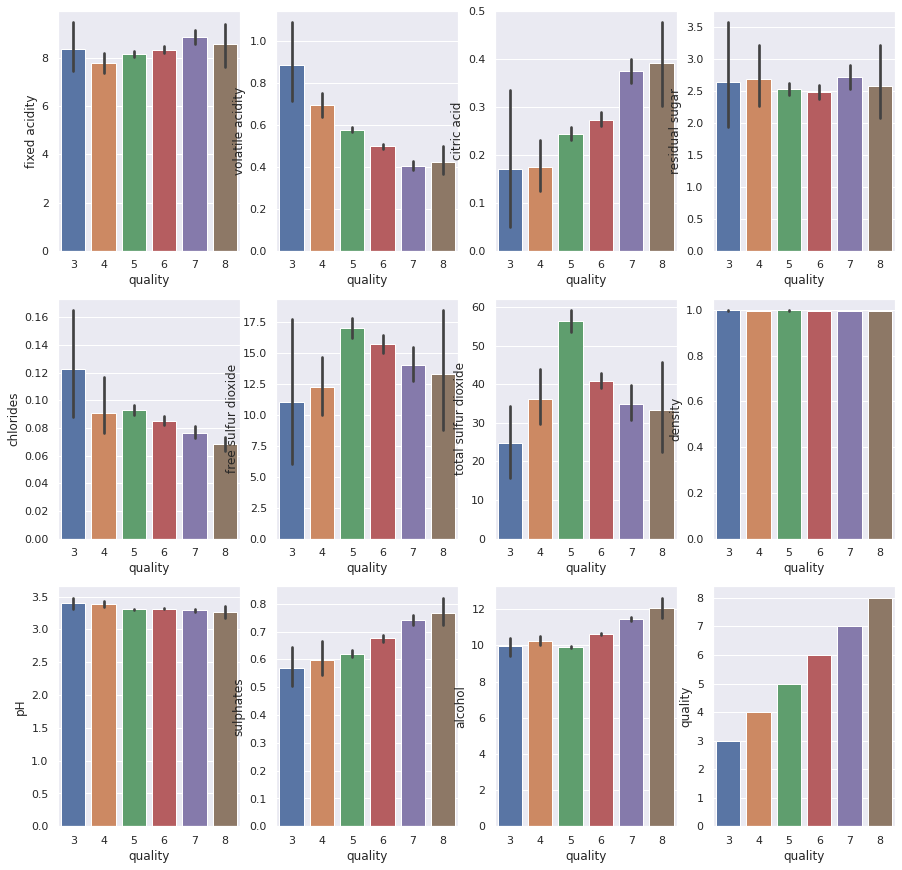

In [11]:
#Univaruate Analysis of Numerical Cols
sns.set()
fig=plt.figure(figsize=(15,15))
count=1
for i in num_col:
  plt.subplot(3,4,count)
  sns.barplot(data=df,x='quality',y=i)
  count+=1
plt.show()

In [12]:
#Pairplot
sns.pairplot(data=df,hue='quality')

Output hidden; open in https://colab.research.google.com to view.


#Traget Analysis

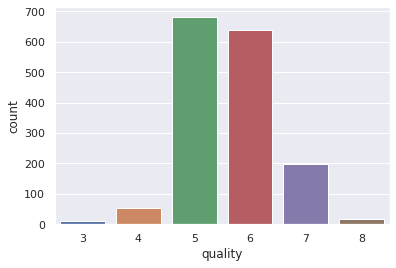

In [13]:
sns.countplot(df['quality'])

In [14]:
#Here we can see modt of the wine ratings between 5 or 6.


In [15]:
#Indepentdent variable an dependent variable
X=df.drop('quality',axis=1)
y=df['quality']

In [16]:
#Dividing dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.2)

In [17]:
X_train.shape

(1279, 11)

In [18]:
X_test.shape

(320, 11)

In [19]:
y_train.shape

(1279,)

In [20]:
y_test.shape

(320,)

In [21]:
  from sklearn.ensemble import RandomForestClassifier

In [22]:
#Model 1:Base Model
rf=RandomForestClassifier()

In [34]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.603125  0.55625   0.553125  0.5625    0.5830721]
Average Cross Validation score :0.5716144200626959


In [37]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
score=cross_val_score(rf,X,y,cv=skf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.671875   0.66875    0.70625    0.66875    0.71473354]
Average Cross Validation score :0.6860717084639498


In [38]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [39]:
#Prediting train and test data
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [40]:
print("Train Data")
print(accuracy_score(y_train,y_pred_train))
print("Test Data")
print(accuracy_score(y_test,y_pred_test))

Train Data
1.0
Test Data
0.640625


In [41]:
#model 2
rf1=RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=12,min_samples_split=10,random_state=500)
rf1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=10,
                       n_estimators=200, random_state=500)

In [42]:
#Prediting train and test data
y_pred_train=rf1.predict(X_train)
y_pred_test=rf1.predict(X_test)

In [43]:
print("Train Data")
print(accuracy_score(y_train,y_pred_train))
print("Test Data")
print(accuracy_score(y_test,y_pred_test))

Train Data
0.9069585613760751
Test Data
0.640625


In [44]:
param_grid={
    "n_estimators":[100,200,300,400],
    "criterion":["gini","entropy"],
    "max_depth":np.arange(1,20),
    "min_samples_split":[5,10,15,20,25,30,35,40],
    }

In [ ]:
model=GridSearchCV(rf1,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
model.fit(X_train,y_train)

In [ ]:
#Prediting train and test data
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [ ]:
y_train_proba=model.predict_proba(X_train)[:1]
y_test_proba=model.predict_proba(X_test)[:1]

In [ ]:
#generate fpr,tpr using roc_auc curve
from sklearn.metrics import roc_auc_curve,auc
fpr,tpr,th=roc_auc_curve(y_test,y_test_proba)
#calculate area under curve
roc_auc=auc(fpr,tpr)
print("Area uder Curve for Model2:",auc)

In [ ]:
#Plotting ROC Curve
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("Flase Positive Rate(1-Specificity)")
plt.ylabel("True Positive rate(sensitivity)")
plt.title("ROC-AUC for Model 2")
plt.show()
